## <center>Applied Data Science with Python</center>
### <center>Marketing Campaigns</center>

#### Problem Scenario:
<div align='justify'>
‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.
</div>

#### Problem Objective:
<div align='justify'>
As a data scientist, you should perform exploratory data analysis and hypothesis testing. The goal is to gain a better understanding of the various factors that contribute to customer acquisition.
</div>

#### Data Description:
<div align='justify'>
The variables birth-year, education, income, and so on are related to the first 'P' or 'People' in the tabular data provided to the user. The amount spent on wine, fruits, gold, etc., is related to ‘Product’. The information pertinent to sales channels, like websites, stores, etc., is related to ‘Place’, and the fields which talk about promotions and results of different campaigns are related to ‘Promotion’.
</div>

#### Steps to Perform:
<div align='justify'>

- Once data is imported, investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly.
- Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status.

- Create variables to populate the total number of children, age, and total spending.

**Hint:** From the number of purchases through the three channels, people can derive the total purchases.

- Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

- Use ordinal encoding and one hot encoding according to different types of categorical variables.

- Create a heatmap to showcase the correlation between different pairs of variables.
</div>

#### Test the following hypotheses:

- Older people are not as tech-savvy and probably prefer shopping in-store.
- Customers with kids probably have less time to visit a store and would prefer to shop online.
- Other distribution channels may cannibalize sales at the store.
- Does the US fare significantly better than the rest of the world in terms of total purchases?


#### Use appropriate visualization to help analyze the following:

- Which products are performing the best, and which are performing the least in terms of revenue?
- Is there any pattern between the age of customers and the last campaign acceptance rate?
- Which Country has the greatest number of customers who accepted the last campaign?
- Do you see any pattern in the no. of children at home and total spend?
- Education background of the customers who complained in the last 2 years.


![image.png](attachment:image.png)

## Step 0: Import libraries

In [45]:
#Import libraries used
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy.stats import ttest_ind
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Step 1: Import Data

In [46]:
#extract the data from csv file
data = pd.read_csv("marketing_data.csv")
data.head ()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Step 2: Data Cleaning + Preprocessing

In [47]:
#Check the number of rows and columns
data.shape

(2240, 28)

In [48]:
#Get concise summary of a dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [49]:
#Get the total of null values in the dataframe
nullValues = data.isnull().sum()
nullValues

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [50]:
#Check for duplicated ID
dfs = pd.read_csv('marketing_data.csv')
dfs = dfs.drop_duplicates(subset=['ID'])
output_csv_file = 'marketing_data.csv'
dfs.to_csv(output_csv_file, index=False)

In [51]:
#Change column Income to make it without space at the begin
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [52]:
#Raplace '$' with '' and ',' with ''
data['Income'] = data['Income'].astype(str).str.replace('$', '').str.replace(',', '')
data['Income'] = data['Income'].astype(float)
print(data['Income'])


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64


In [53]:
#Get the total of children
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

In [54]:
#Get the age by calculate it
todays_date = date.today()
data['Age'] = todays_date.year - data['Year_Birth']

In [55]:
#Get the total spending
data['Total_Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [56]:
#Get the total pruches
data['Total_Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases']+ data['NumStorePurchases']

In [57]:
#Change data type of Dt_Customer to date
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer']);

In [58]:
#Fill the null Income by mean of Income based on Education and Marital Status
data['Income'] = data['Income'].fillna(data.groupby(['Education', 'Marital_Status'])['Income'].transform('mean'))

In [59]:
#Check Income describe
data['Income'].describe()

count      2240.000000
mean      52248.748825
std       25039.981052
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [60]:
#Create a subset dataframe include numaric columns that will create box plots and histograms of it
num_vars = data[['Income', 'Age', 'Total_Spending', 'Total_Purchases']]

In [61]:
#Plotly setup
plot_rows=1
plot_cols=4
#Make subplots of box plots
fig = make_subplots(rows=plot_rows, cols=plot_cols)

#for loop to add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        #Make box plot of each column in num_vars dataframe
        fig.add_trace(go.Box(boxpoints='all',y=num_vars[num_vars.columns[x]].values,
                                 name = num_vars.columns[x],
                             ),
                     row=i,
                     col=j)

        x=x+1

#Format and show fig
fig.update_layout(title_text='Box Plots', title_x=0.5,height=800, width=900)
fig.show()
print ('Income has extreme outliers.')

Income has extreme outliers.


In [62]:
#Removing outliers from ['Income', 'Age', 'Total_Spending', 'Total_Purchases'] columns
Q1 = num_vars.quantile(0.25)
Q3 = num_vars.quantile(0.75)
IQR = Q3 - Q1
num_vars = num_vars[~((num_vars < (Q1 - 1.5 * IQR)) |(num_vars > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
#Plotly setup
plot_rows=1
plot_cols=4
#Make subplots of box plots
fig = make_subplots(rows=plot_rows, cols=plot_cols)

#for loop to add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        #Make box plot of each column in num_vars dataframe
        fig.add_trace(go.Box(boxpoints='all',y=num_vars[num_vars.columns[x]].values,
                                 name = num_vars.columns[x],
                             ),
                     row=i,
                     col=j)

        x=x+1

#Format and show fig
fig.update_layout(title_text='Box Plots after removing outliers', title_x=0.5,height=800, width=900)
fig.show()

In [64]:
num_vars = data[['Income', 'Age', 'Total_Spending', 'Total_Purchases']]

In [65]:
#Plotly setup
plot_rows=1
plot_cols=4
#Make subplots of histogram
fig = make_subplots(rows=plot_rows, cols=plot_cols)

#Add traces
x = 0
#for loop to add traces
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        #Make histogram of each column in num_vars dataframe
        fig.add_trace(go.Histogram(x=num_vars[num_vars.columns[x]].values,
                                 name = num_vars.columns[x],
                                 marker=dict(line=dict(width=0.8,
                                    color="grey"))
                            ),
                     row=i,
                     col=j)

        x=x+1


#Format and show fig
fig.update_layout(title_text='Histograms', title_x=0.5)
fig.update_layout(height=450, width=1250)
fig.show()

In [66]:
data['Income'] = num_vars['Income'].values
data['Age'] = num_vars['Age'].values
data['Total_Spending'] = num_vars['Total_Spending'].values
data['Total_Purchases'] = num_vars['Total_Purchases'].values


In [67]:
#Create uncoding Education
Education_column = data[['Education']]
encoder = OrdinalEncoder().set_output(transform="pandas")
data['Education_encoder'] = encoder.fit_transform(Education_column)
data['Education_encoder'] = data['Education_encoder'].astype('int64')
data[['Education_encoder', 'Education']]

,Education_encoder,Education
0,2,Graduation
1,2,Graduation
2,2,Graduation
3,2,Graduation
4,2,Graduation
...,...,...
2235,4,PhD
2236,0,2n Cycle
2237,2,Graduation
2238,2,Graduation


In [68]:
#Create uncoding Marital_Status
Marital_Status_column = data[["Marital_Status"]]
encoder = OrdinalEncoder().set_output(transform="pandas")
data['Marital_Status_encoder'] = encoder.fit_transform(Marital_Status_column)
data['Marital_Status_encoder'] = data['Marital_Status_encoder'].astype('int64')
data[['Marital_Status_encoder', 'Marital_Status']]

,Marital_Status_encoder,Marital_Status
0,2,Divorced
1,4,Single
2,3,Married
3,5,Together
4,4,Single
...,...,...
2235,2,Divorced
2236,3,Married
2237,2,Divorced
2238,3,Married


In [69]:
#Create uncoding Country
Country_column = data[["Country"]]
encoder = OrdinalEncoder().set_output(transform="pandas")
data['Country_encoder'] = encoder.fit_transform(Country_column)
data['Country_encoder'] = data['Country_encoder'].astype('int64')
data[['Country_encoder', 'Country']]

,Country_encoder,Country
0,6,SP
1,1,CA
2,7,US
3,0,AUS
4,6,SP
...,...,...
2235,7,US
2236,6,SP
2237,6,SP
2238,3,IND


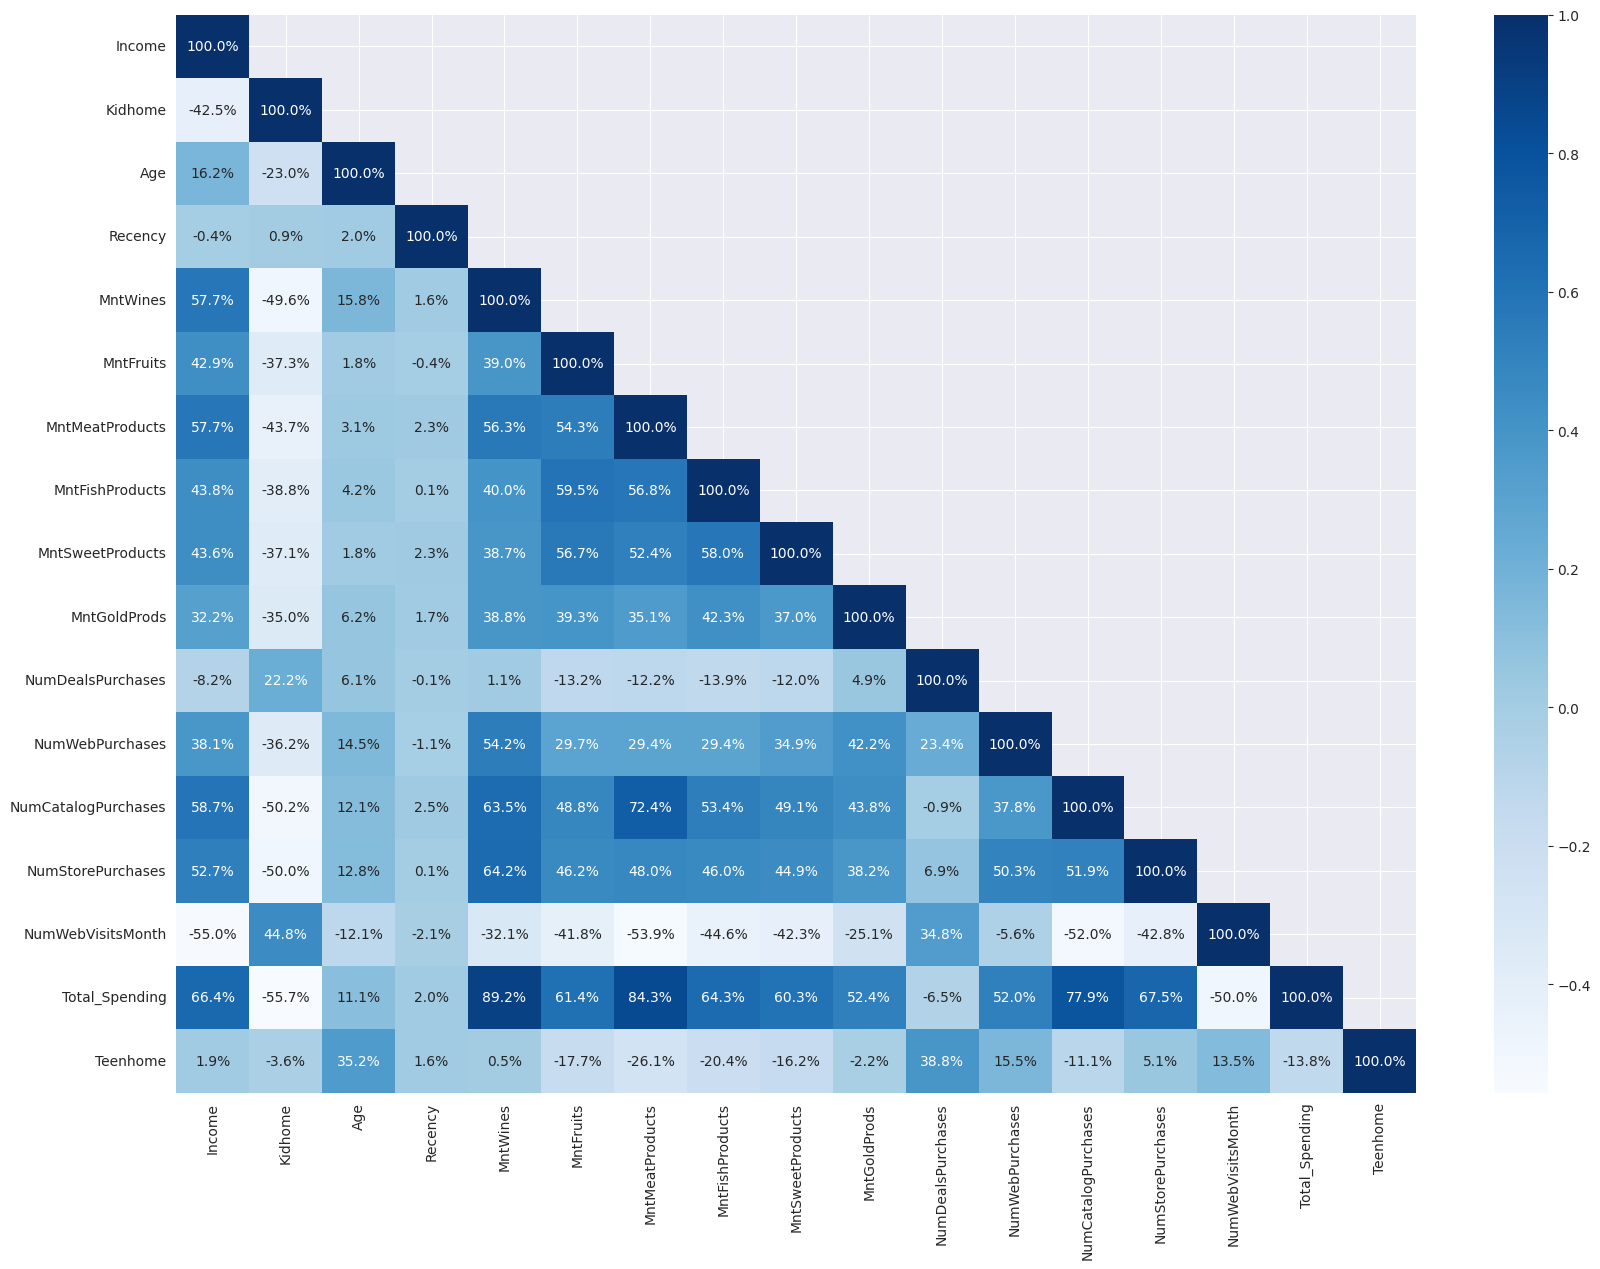

In [70]:
#Create a subset dataframe include numaric columns that will create heatmap to find the correlation
var_cor = ['Income', 'Kidhome', 'Age',  'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Total_Spending',
'Teenhome', 'Dt_Customer']

cor_data = data[var_cor].corr()
plt.figure(figsize = (20,14))
m = np.ones_like(cor_data)
m[np.tril_indices_from(m)]=0
sns.heatmap(cor_data,annot = True,mask = m,fmt='.1%',cmap="Blues")
plt.show()

In [71]:
#Save cleaned data fille as csv to check uncoding or other methods
Check_Data = data
file_path = 'Check_Data.csv'
Check_Data.to_csv(file_path, index=False)


## Step 4: Testing

#### **Hypothesis 1:** Older people are not as tech-savvy and probably prefer shopping in-store.

**Null Hypothesis (H0):** Older people are  prefer shopping on-web more than or equal to shopping in-store.

**Alternative Hypothesis (H1)):** Older people are  prefer shopping in-store more than shopping on-web.

p-value = 0.0, So we accept the alternative and reject the null.
Older people are prefer shopping in-store more than shopping on-web.
the total purchase on the Web by old people was :  7203
the total purchase on the store by old people was :  10024


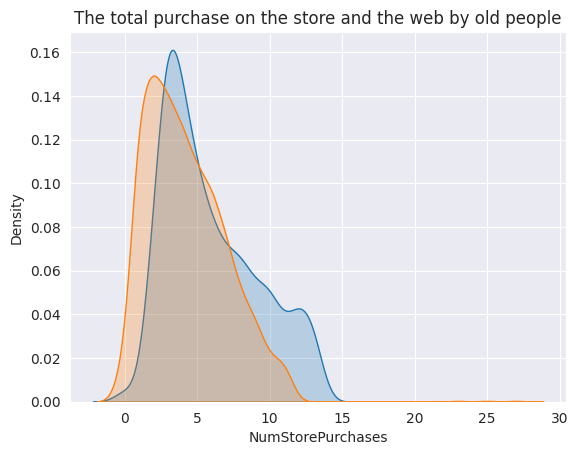

In [72]:
#Extraxt the data of age col of older papeole
older_group = data[data["Age"] > 45]  # Define a cutoff age for "older"

#Perform the t-test
t_statistic, p_value = ttest_ind(older_group["NumStorePurchases"], older_group["NumWebPurchases"],alternative='greater')

if p_value < 0.05:
    print('p-value = {}, So we accept the alternative and reject the null.'.format(round(p_value, 4)))
    print ('Older people are prefer shopping in-store more than shopping on-web.')
else:
    print('p-value = {}, So we accept the null and reject the alternative.'.format(round(p_value, 4)))
    print ('Older people are prefer shopping on-web more than shopping in-store.')

print('the total purchase on the Web by old people was : ',older_group["NumWebPurchases"].sum())
print('the total purchase on the store by old people was : ', older_group["NumStorePurchases"].sum())


#Format and show fig
sns.set_style('darkgrid')
sns.kdeplot(older_group["NumStorePurchases"],fill = True);
sns.kdeplot(older_group["NumWebPurchases"],fill = True);
plt.title("The total purchase on the store and the web by old people");

#### **Hypothesis 2:** Customers with kids probably have less time to visit a store and would prefer to shop online.

**Null Hypothesis (H0):** Customers with kids are more likely to prefer shopping in-store more than or equal to shopping online.

**Alternative Hypothesis (H1):** Customers with kids are more likely to prefer shopping online more than shopping in-store.

p-value = 1.0, So we accept the null and reject the alternative.
Customers with kids are more likely to prefer shopping in-store more than shopping online.
the total purchase on the Web by people With Kids was:  6347
the total purchase on the store by people With Kids was:  8335


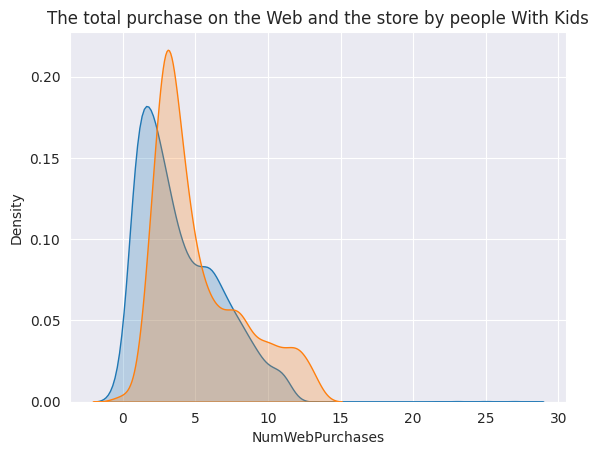

In [73]:
#Extraxt the data of customer who have kids
With_Kids = data[data['Total_Children'] > 0]

#Perform the t-test
t_statistic, p_value = ttest_ind(With_Kids['NumWebPurchases'], With_Kids['NumStorePurchases'],alternative='greater')

if p_value < 0.05:
    print('p-value = {}, So we accept the alternative and reject the null.'.format(round(p_value, 4)))
    print ('Customers with kids are more likely to prefer shopping online more than shopping in-store.')
else:
    print('p-value = {}, So we accept the null and reject the alternative.'.format(round(p_value, 4)))
    print ('Customers with kids are more likely to prefer shopping in-store more than shopping online.')

print('the total purchase on the Web by people With Kids was: ',With_Kids['NumWebPurchases'].sum())
print('the total purchase on the store by people With Kids was: ',With_Kids['NumStorePurchases'].sum())

#Format and show fig
sns.set_style('darkgrid')
sns.kdeplot(With_Kids['NumWebPurchases'],fill = True);
sns.kdeplot(With_Kids['NumStorePurchases'],fill = True);
plt.title('The total purchase on the Web and the store by people With Kids');

#### **Hypothesis 3:** Other distribution channels may cannibalize sales at the store.

**Null Hypothesis (H0):** Customers prefer to shop in deals, web and catalogs less than or equal to shop in stores.

**Alternative Hypothesis (H1):** Customers prefer to shop in deals, web and catalogs more than to shop in stores.

p-value = 0.0, So we accept the alternative and reject the null
Customers prefer to shop in deals, web and catalogs more than to shop in stores.


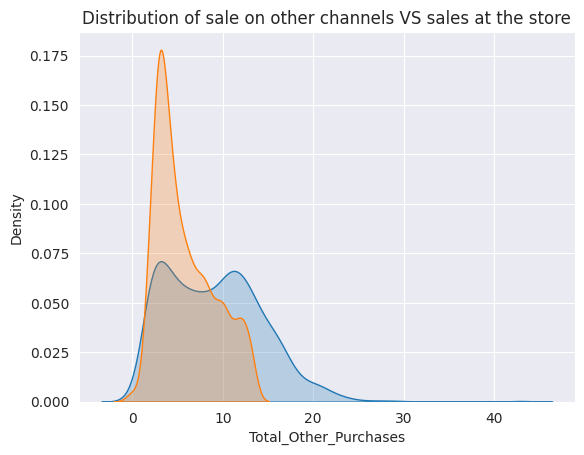

In [74]:
#Calculate the total number of purchases made through deals, web and catalogs
otherChanels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
data["Total_Other_Purchases"]= data[otherChanels].sum(axis=1)

#Perform the t-test
t_statistic, p_value = ttest_ind(data['Total_Other_Purchases'], data['NumStorePurchases'],alternative='greater')

if p_value < 0.05:
    print('p-value = {}, So we accept the alternative and reject the null'.format(round(p_value, 4)))
    print ('Customers prefer to shop in deals, web and catalogs more than to shop in stores.')
else:
    print('p-value = {}, So we accept the null and reject the alternative'.format(round(p_value, 4)))
    print ('Customers prefer to shop in deals, web and catalogs less than or equal to shop in stores.')

#Format and show fig
sns.set_style('darkgrid')
sns.kdeplot(data["Total_Other_Purchases"],fill = True);
sns.kdeplot(data['NumStorePurchases'],fill = True);
plt.title('Distribution of sale on other channels VS sales at the store');

#### **Hypothesis 4:** Does the US fare significantly better than the rest of the world in terms of total purchases?

**Null Hypothesis (H0):** The rest of the world has significantly higher total purchases compared to the US.

**Alternative Hypothesis (H1):** The US has significantly higher total purchases compared to the rest of the world.

p-value = 0.9644, So we accept the null and reject the alternative
The rest of the world has significantly higher total purchases compared to the US.
number of total purchases by US:  1761
number of total purchases by Other_Country:  31530


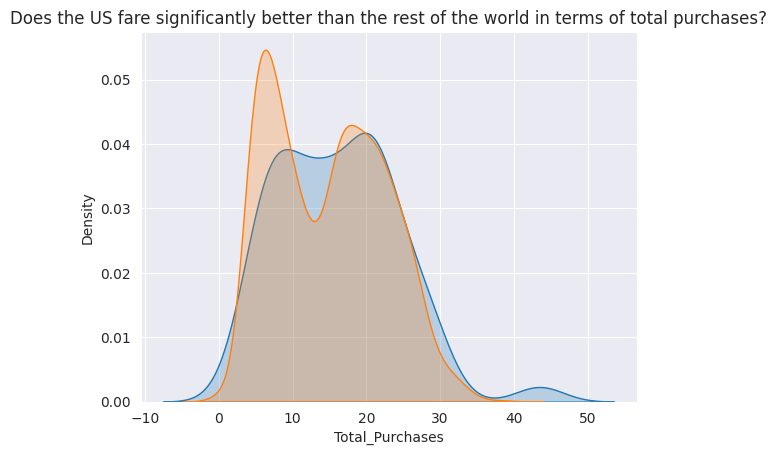

In [75]:
#Country was uncoded  to  'US': 7
US = data[data["Country_encoder"] == 7]  #
Other_Country = data[data["Country_encoder"]!= 7 ]

#Perform the t-test
t_statistic, p_value = ttest_ind(Other_Country["Total_Purchases"], US["Total_Purchases"],alternative='greater')

if p_value < 0.05:
    print('p-value = {}, So we accept the alternative and reject the null'.format(round(p_value, 4)))
    print ('The US has significantly higher total purchases compared to the rest of the world.')
else:
    print('p-value = {}, So we accept the null and reject the alternative'.format(round(p_value, 4)))
    print ('The rest of the world has significantly higher total purchases compared to the US.')

print("number of total purchases by US: ",US["Total_Purchases"].sum())
print("number of total purchases by Other_Country: ",Other_Country["Total_Purchases"].sum())

#Format and show fig
sns.set_style('darkgrid')
sns.kdeplot(US['Total_Purchases'],shade = True);
sns.kdeplot(Other_Country['Total_Purchases'],shade = True);
plt.title('Does the US fare significantly better than the rest of the world in terms of total purchases?');


## Step 5: Analysis + visualization

> **Which products are performing the best, and which are performing the least in terms of revenue?**

In [76]:
#Which products are performing the best, and which are performing the least in terms of revenue?
meat=data['MntMeatProducts'].sum()
fruit=data['MntFruits'].sum()
wine=data['MntWines'].sum()
fish=data['MntFishProducts'].sum()
sweat=data['MntSweetProducts'].sum()
gold=data['MntGoldProds'].sum()
#--------------------------------------------

products = ['wine', 'meat', 'gold', 'fish', 'fruit','sweat']
revenue = [wine,meat,gold,fish,fruit,sweat]
data_dict = {'Product': products, 'Revenue': revenue}

fig=px.bar(data,x=products,y=revenue, labels={'x': 'Products', 'y':'Revenue'})
fig.update_layout(title_text='Comparitive Product Performance', title_x=0.5)
fig.show()
print ('Based on the Bar Plot shown the highest revenue product is wine. Conversely, sweet is the lowest revenue product.')

Based on the Bar Plot shown the highest revenue product is wine. Conversely, sweet is the lowest revenue product.


> **Is there any pattern between the age of customers and the last campaign acceptance rate?**

In [77]:
#Is there any pattern between the age of customers and the last campaign acceptance rate?
Accepted_Binary = data[data["AcceptedCmp5"] == 1]
data['Accepted_last_campaign']=Accepted_Binary["Age"]
df = px.data.tips()
fig = px.histogram(data, x='Age', y= 'Accepted_last_campaign' ,  color = 'AcceptedCmp5',barmode = 'overlay')
fig.update_layout(title_text='Relationship between Age and Campaign Acceptance Rate', title_x=0.5, xaxis_title_text = 'Age', yaxis_title_text = 'Accepted (1)')
fig.show()
# Correlation Analysis:
correlation = data['Age'].corr(data['AcceptedCmp5'])
print(f'The correlation between age and campaign acceptances rate is: {correlation:.2f}.\nSo, the relationship is negative between age and acceptance of the campaign what means if age increased acceptance of the campaign\nis decreased, and the most accepted age of the campaign was between 50-51.')


The correlation between age and campaign acceptances rate is: -0.01.
So, the relationship is negative between age and acceptance of the campaign what means if age increased acceptance of the campaign
is decreased, and the most accepted age of the campaign was between 50-51.


> **Which Country has the greatest number of customers who accepted the last campaign?**

In [78]:
#Which Country has the greatest number of customers who accepted the last campaign?
fig = px.histogram(Accepted_Binary, x='Country', category_orders=dict(Country=['SP', 'SA', 'CA', 'AUS', 'GER', 'IND','US']))
fig.update_layout(title_text='Number of Customers Accepting the Last Campaign by Country', title_x=0.5,
xaxis_title_text = 'Country',yaxis_title_text = 'Number of Customers')
fig.show()
print ('Based on the histogram shown SP has maximum number of customers who accepted the last campaign. Furthmore, US is the minimum.')

Based on the histogram shown SP has maximum number of customers who accepted the last campaign. Furthmore, US is the minimum.


> **Do you see any pattern in the no. of children at home and total spend?**

In [79]:
#Do you see any pattern in the no. of children at home and total spend?
fig = px.box(data, x="Total_Children", y="Total_Spending")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(title_text='Relationship between Number of Children at Home and Total Spending', title_x=0.5, xaxis_title_text = 'Total Children', yaxis_title_text = 'Total Spending')
fig.show()

# Correlation Analysis:
correlation = data['Total_Children'].corr(data['Total_Spending'])
print(f'Correlation between Children at Home and Total Spend: {correlation:.2f}.\nThe box plots indicate a perfect negative correlation, meaning that as a children at home increases, the total spend decreases linearly.')

Correlation between Children at Home and Total Spend: -0.50.
The box plots indicate a perfect negative correlation, meaning that as a children at home increases, the total spend decreases linearly.


> **Education background of the customers who complained in the last 2 years.**

In [80]:
#Education background of the customers who complained in the last 2 years.
df_filtered = data[['Education', 'Dt_Customer', 'Complain']].copy()
df_filtered = df_filtered[df_filtered.Complain == 1]
df_filtered = df_filtered[data.Dt_Customer.dt.year >= 2013]
df_filtered ['Year'] = df_filtered ['Dt_Customer'].dt.year
fig = px.bar(df_filtered, x='Year', y='Complain',color='Education', barmode='group')
fig.update_layout(title_text='Education background of the customers who complained in the last 2 years', title_x=0.5, xaxis_title_text = 'Year', yaxis_title_text = 'Complain')
fig.show()
print ('Based on the Bar Plot shown on the last two years [2013-2014] graduation level of education has most complains.')

Based on the Bar Plot shown on the last two years [2013-2014] graduation level of education has most complains.
